# 1.4.15 Image Segmentation with Watershed Algorithm

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('ccoin.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

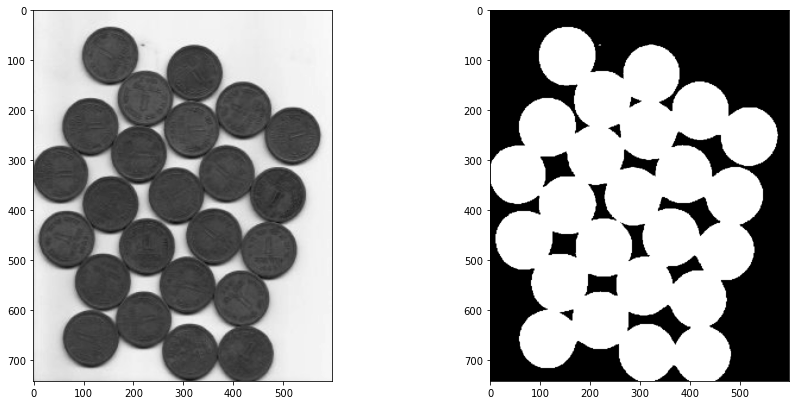

In [3]:
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(gray, 'gray')
plt.subplot(222), plt.imshow(thresh,'gray')
plt.show()

In [4]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

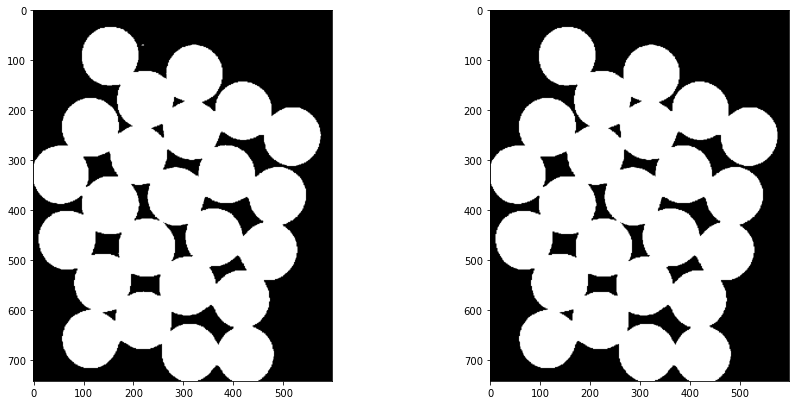

In [5]:
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(thresh, 'gray')
plt.subplot(222), plt.imshow(opening,'gray')
plt.show()

In [6]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

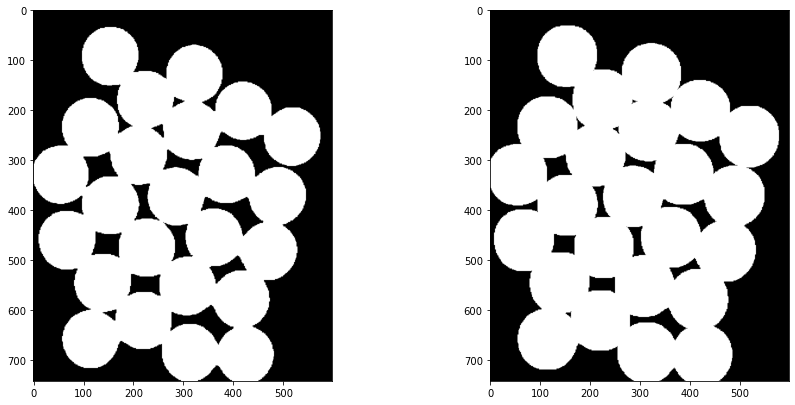

In [7]:
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(opening, 'gray')
plt.subplot(222), plt.imshow(sure_bg,'gray')
plt.show()

In [8]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

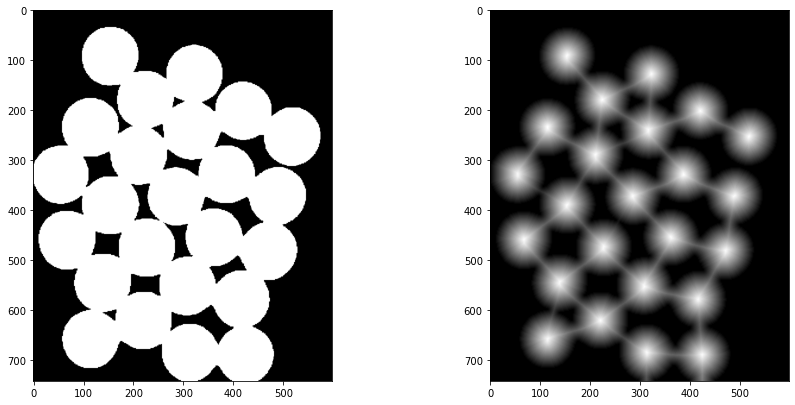

In [9]:
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(opening, 'gray')
plt.subplot(222), plt.imshow(dist_transform,'gray')
plt.show()

In [10]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

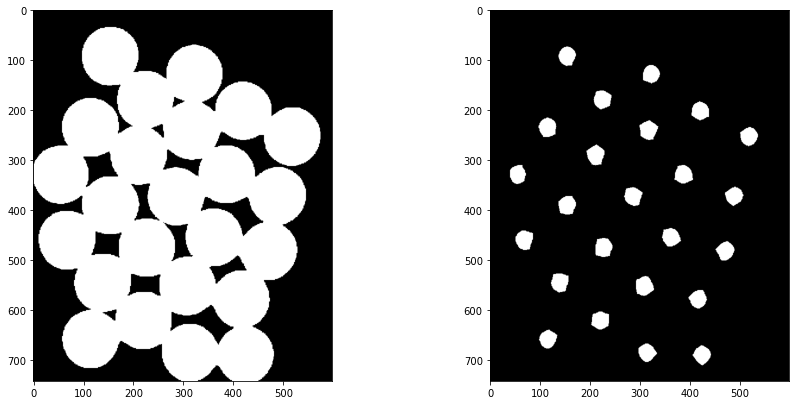

In [11]:
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(opening, 'gray')
plt.subplot(222), plt.imshow(sure_fg,'gray')
plt.show()

In [12]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

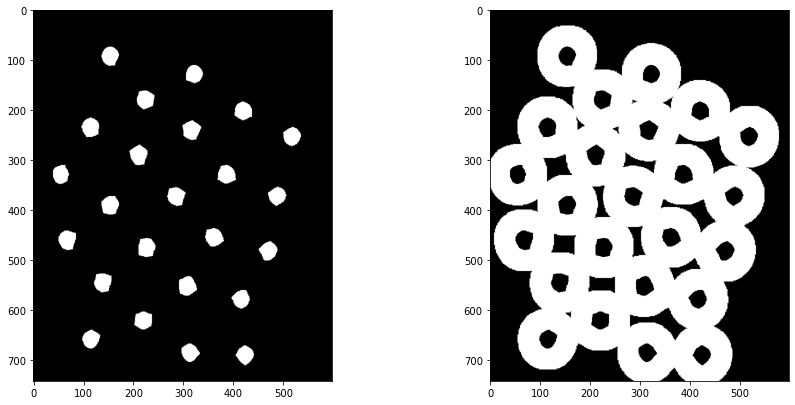

In [13]:
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(sure_fg, 'gray')
plt.subplot(222), plt.imshow(unknown,'gray')
plt.show()

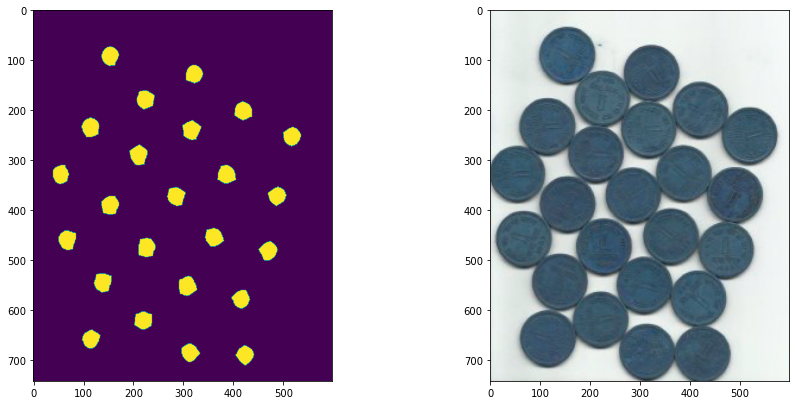

In [15]:
plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(sure_fg)
plt.subplot(222), plt.imshow(img)
plt.show()
